In [1]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt



In [2]:
file_name = "data/record0.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

In [3]:
time = [1/f.samplefrequency(0) * i for i in range(len(sigbufs[0]))]

In [4]:
annotations = f.readAnnotations()  
events = annotations[0]

In [5]:
borders = []

In [56]:
def GenEvent(i, time, events, eeg, check_left, check_right):
    idx = np.array(time < events[i]).argmin()
    plt.figure(figsize=(16,9))
    f3_c3 = eeg[2]
    c3_p3 = eeg[4] - 50
    
    if idx - 20 < 0:
        plt.plot(f3_c3[idx: idx + 100], label="F3-C3")
        plt.plot(c3_p3[idx: idx + 100], label="C3-P3")
        
    elif idx + 20 >= len(time):
        labels[idx - 20:idx] = 1
        plt.plot(f3_c3[idx - 50: idx], label="F3-C3")
        plt.plot(c3_p3[idx - 50: idx], label="C3-P3")
    else:
        plt.plot(f3_c3[idx - 100: idx + 100], label="F3-C3")
        plt.plot(c3_p3[idx - 100: idx + 100], label="C3-P3")
        plt.plot([100 - check_left] * 2, [-100, 100], color="red")
        plt.plot ([ 100 + check_right] * 2, [-100, 100], color = "red")
    plt.legend()
    plt.show()
    return idx - check_left, idx + check_right, i

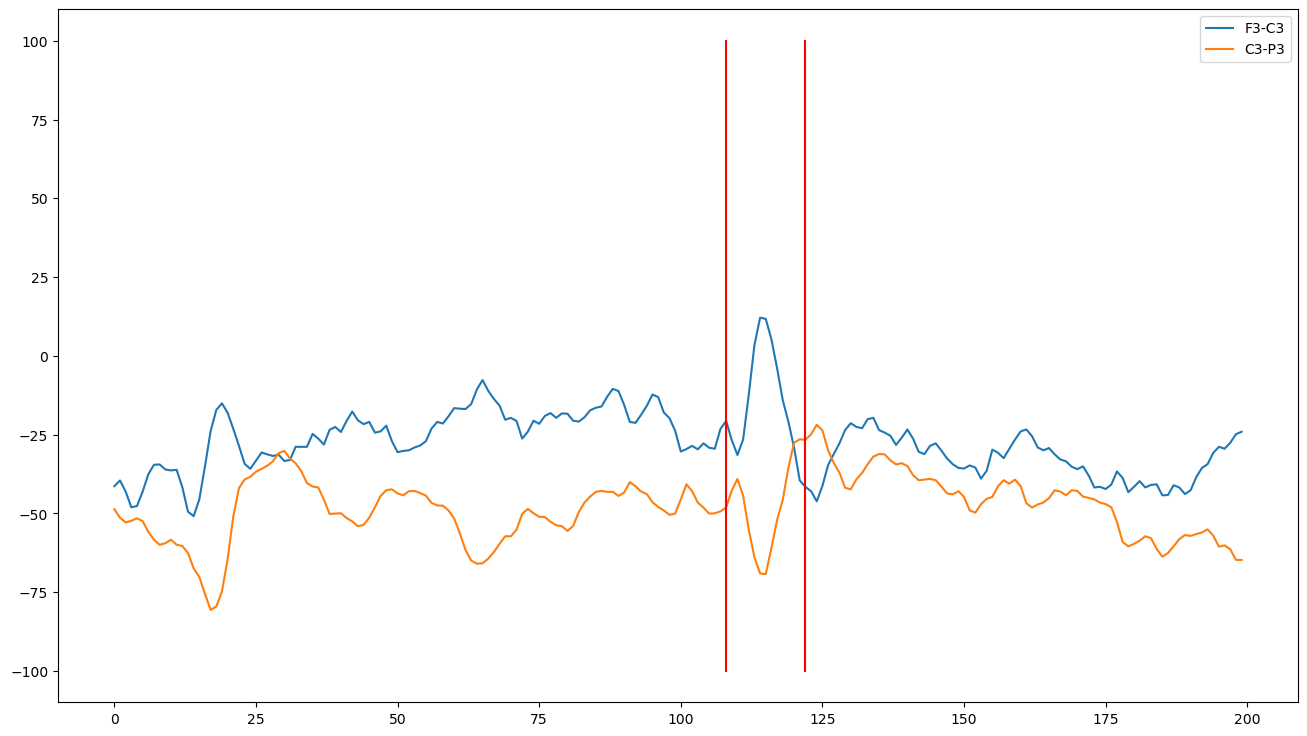

In [67]:
bords = GenEvent(506, time, events, sigbufs, -8, 22)

In [68]:
borders.append(bords)

In [70]:
np.save("data/first_borders", np.array(borders))